# Handwriting Recognition using Deep Learning 

In [1]:
# Import needed libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
# import cv2

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

#keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics

Using TensorFlow backend.


#  EMNIST

### Data Preprocessing

In [26]:
# a.Load data

#  train data
train = pd.read_csv("EMNIST/emnist-balanced-train.csv")
print("train data")
train.shape
train.head()

#  test data
test= pd.read_csv("EMNIST/emnist-balanced-test.csv")
print("test data")
test.shape
test.head()


mapp = pd.read_csv("EMNIST/emnist-balanced-mapping.txt")


# Split train and test data to x and y
X_train = train.iloc[:,1:]
X_train_ = X_train
Y_train = train.iloc[:,0]
Y_train_= Y_train
X_test = test.iloc[:,1:]
Y_test = test.iloc[:,0]
Y_test_ = Y_test
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

# b.Normalization
# to improve CNN performance
X_train = X_train / 255.0
X_test = X_test / 255.0

# c.Reshape
# The images are of a 2D array shape, and to apply CNN with Keras we need to reshape them to 3D matrices. Size of images are (28px x 28px), we reshape them to (28x28x1).
# [batch_size, 28, 28, 1], -1 means the value is inferred from the length of the array
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

# d.Label encoding
# We need to encode these lables to one hot vectors to be either 0 or 1.
from keras.utils.np_utils import to_categorical # one-hot-encoding
num_classes = Y_train.nunique()
Y_train = to_categorical(Y_train, num_classes )
Y_test = to_categorical(Y_test, num_classes )
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

# # e.Split training and valdiation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

train data


(112799, 785)

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test data


(18799, 785)

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(112799, 784) (112799,) (18799, 784) (18799,)
Y_train:  (112799, 47)
Y_test:  (18799, 47)


((101519, 28, 28, 1), (11280, 28, 28, 1), (101519, 47), (11280, 47))

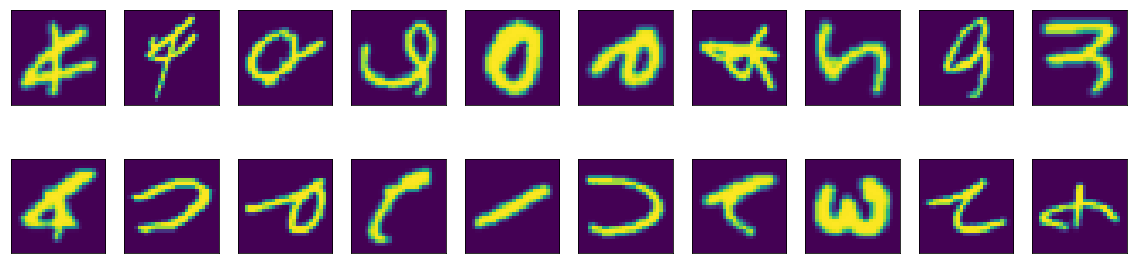

In [21]:
# Display samples of images

plt.figure(figsize=(20,5))
for r in range(0,20):
    plt.subplot(2,10,r+1);
    f= plt.imshow(X_train[r].reshape(28,28))
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
plt.show()  ;


### CNN

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D

# a.Create the model

model = Sequential()

model.add(Conv2D(128,(5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

#Display the CNN structure
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [5]:
# b.Compile the model 

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy",  metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")])

# performance Without data augmentation 
history = model.fit(X_train, Y_train, epochs = 10, batch_size=512,
         validation_data = (X_val, Y_val))



Train on 101519 samples, validate on 11280 samples
Epoch 1/10
101519/101519 [==============================] - 206s 2ms/sample - loss: 1.5665 - acc: 0.5534 - val_loss: 0.5558 - val_acc: 0.8203
Epoch 2/10
101519/101519 [==============================] - 211s 2ms/sample - loss: 0.7452 - acc: 0.7634 - val_loss: 0.4413 - val_acc: 0.8482
Epoch 3/10
101519/101519 [==============================] - 204s 2ms/sample - loss: 0.6167 - acc: 0.7988 - val_loss: 0.3990 - val_acc: 0.8612
Epoch 4/10
101519/101519 [==============================] - 200s 2ms/sample - loss: 0.5500 - acc: 0.8185 - val_loss: 0.3819 - val_acc: 0.8637
Epoch 5/10
101519/101519 [==============================] - 207s 2ms/sample - loss: 0.5101 - acc: 0.8296 - val_loss: 0.3659 - val_acc: 0.8676
Epoch 6/10
101519/101519 [==============================] - 204s 2ms/sample - loss: 0.4771 - acc: 0.8395 - val_loss: 0.3546 - val_acc: 0.8703
Epoch 7/10
101519/101519 [==============================] - 185s 2ms/sample - loss: 0.4476 - acc:

In [6]:
# c.Data Augmentation
# To avoid overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,  # rotate images in range (degrees, 0 to 180)
        zoom_range = 0.1, #  zoom image 
        width_shift_range=0.1,  #  shift images horizontally 
        height_shift_range=0.1,  #  shift images vertically 
        horizontal_flip=False,  #  flip images
        vertical_flip=False)  #  flip images



# d.Fit the model
datagen.fit(X_train)

#Get the obtained  performance of different training epochs
history = model.fit_generator(datagen.flow(X_train,Y_train),
                              epochs = 10, validation_data = (X_val,Y_val))


Epoch 1/10
3173/3173 [==============================] - 994s 313ms/step - loss: 0.7262 - acc: 0.7619 - val_loss: 0.3520 - val_acc: 0.8707
Epoch 2/10
3173/3173 [==============================] - 930s 293ms/step - loss: 0.5905 - acc: 0.8017 - val_loss: 0.3551 - val_acc: 0.8734
Epoch 3/10
3173/3173 [==============================] - 976s 308ms/step - loss: 0.5507 - acc: 0.8145 - val_loss: 0.3403 - val_acc: 0.8721
Epoch 4/10
3173/3173 [==============================] - 951s 300ms/step - loss: 0.5214 - acc: 0.8239 - val_loss: 0.3287 - val_acc: 0.8812
Epoch 5/10
3173/3173 [==============================] - 915s 288ms/step - loss: 0.4995 - acc: 0.8300 - val_loss: 0.3366 - val_acc: 0.8762
Epoch 6/10
3173/3173 [==============================] - 939s 296ms/step - loss: 0.4882 - acc: 0.8346 - val_loss: 0.3284 - val_acc: 0.8762
Epoch 7/10
3173/3173 [==============================] - 917s 289ms/step - loss: 0.4778 - acc: 0.8370 - val_loss: 0.3359 - val_acc: 0.8783
Epoch 8/10
3173/3173 [============

### Model Evaluation

In [83]:

# Evaluate model on Test set
score = model.evaluate(X_test, Y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



18799/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.3358963025910492
Test accuracy: 0.88361084


<Figure size 576x576 with 0 Axes>

Text(0,0.5,'Accuracy')

(-1, 1)

Text(0.5,1,'Training and Validation Accuracy')

Text(0,0.5,'Cross Entropy')

(-1, 1.0)

Text(0.5,1,'Training and Validation Loss')

Text(0.5,0,'epoch')

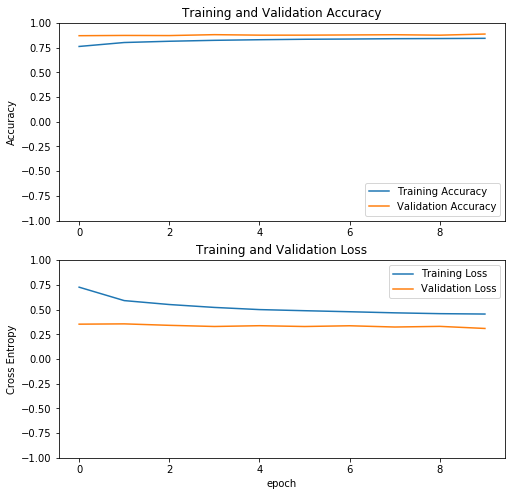

In [7]:
# plot accuracy and loss

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


Text(0.5,159,'Predicted Label')

Text(159,0.5,'True Label')

Text(0.5,1,'Confusion Matrix')

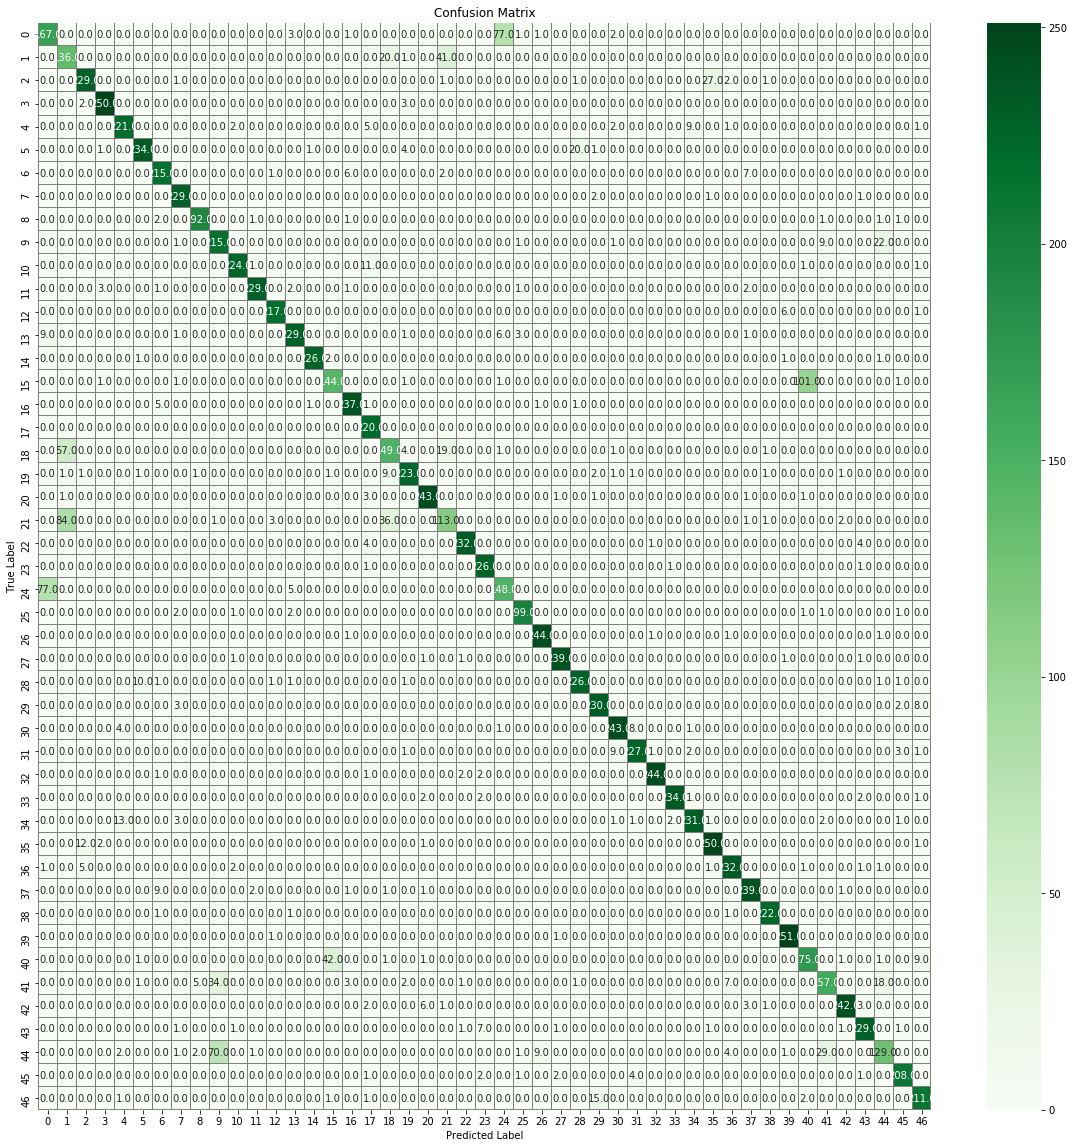

In [12]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()